In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Data download

### New Race Dataset

In [2]:
new_race = pd.read_excel("datasets/POP2000.xlsx")
new_race.head()

,fips,stname,ctyname,state,county,year,tot_pop,tot_male,tot_female,nh_male,...,hba_male,hba_female,hia_male,hia_female,haa_male,haa_female,hna_male,hna_female,htom_male,htom_female
0,1001,Alabama,Autauga County,1,1,2000,44021,21385,22636,21052,...,27,22,8,4,3,6,0,1,4,5
1,1001,Alabama,Autauga County,1,1,2001,44889,21813,23076,21449,...,26,22,8,4,3,9,0,1,3,4
2,1001,Alabama,Autauga County,1,1,2002,45909,22362,23547,21967,...,28,26,8,4,2,6,1,2,5,4
3,1001,Alabama,Autauga County,1,1,2003,46800,22760,24040,22335,...,29,28,12,7,2,5,1,2,8,6
4,1001,Alabama,Autauga County,1,1,2004,48366,23512,24854,23056,...,27,29,12,8,2,6,2,2,10,7


In [3]:
race_2010 = new_race[new_race['year'] == 2010]

In [4]:
race_2010['Hispanic'] = race_2010['h_male'] + race_2010['h_female']
race_2010['White'] = race_2010['wa_male'] + race_2010['wa_female']
race_2010['Black'] = race_2010['ba_male'] + race_2010['ba_female']
race_2010['Native American'] = race_2010['ia_male'] + race_2010['ia_female']
race_2010['Asian'] = race_2010['aa_male'] + race_2010['aa_female']
race_2010['Pacific Islander'] = race_2010['na_male'] + race_2010['na_female']
race_2010['Other'] = race_2010['tom_male'] + race_2010['tom_female']
race_2010['Total'] = (race_2010['Hispanic'] + race_2010['White'] + race_2010['Black']
                   + race_2010['Native American'] + race_2010['Asian'] 
                   + race_2010['Pacific Islander'] + race_2010['Other'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to 

In [5]:
race_2010[['fips', 'stname', 'ctyname', 'state', 'county', 'year', 'tot_pop', 
          'Total', 'Hispanic', 'White', 'Black', 'Native American', 'Asian',
          'Pacific Islander', 'Other']].head()

,fips,stname,ctyname,state,county,year,tot_pop,Total,Hispanic,White,Black,Native American,Asian,Pacific Islander,Other
10,1001,Alabama,Autauga County,1,1,2010,54632,55975,1343,43320,9743,280,490,42,757
21,1003,Alabama,Baldwin County,1,3,2010,183195,191273,8078,160458,17406,1338,1392,125,2476
32,1005,Alabama,Barbour County,1,5,2010,27411,28770,1359,13932,12906,152,116,39,266
43,1007,Alabama,Bibb County,1,7,2010,22867,23270,403,17497,5065,86,43,14,162
54,1009,Alabama,Blount County,1,9,2010,57338,61988,4650,55372,839,304,158,59,606


In [6]:
race_2010['Hispanic_perc'] = race_2010['Hispanic'] / race_2010['Total']
race_2010['White_perc'] = race_2010['White'] / race_2010['Total']
race_2010['Black_perc'] = race_2010['Black'] / race_2010['Total']
race_2010['Native_American_perc'] = race_2010['Native American'] / race_2010['Total']
race_2010['Asian_perc'] = race_2010['Asian'] / race_2010['Total']
race_2010['Pacific_Islander_perc'] = race_2010['Pacific Islander'] / race_2010['Total']
race_2010['Other_perc'] = race_2010['Other'] / race_2010['Total']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to 

In [8]:
df = race_2010[['fips', 'stname', 'ctyname', 'state', 'county', 'tot_pop', 'Hispanic_perc',
                'White_perc', 'Black_perc', 'Native_American_perc', 'Asian_perc',
                'Pacific_Islander_perc', 'Other_perc']]
df.head()

,fips,stname,ctyname,state,county,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,Asian_perc,Pacific_Islander_perc,Other_perc
10,1001,Alabama,Autauga County,1,1,54632,0.023993,0.773917,0.174060,0.005002,0.008754,0.000750,0.013524
21,1003,Alabama,Baldwin County,1,3,183195,0.042233,0.838895,0.091001,0.006995,0.007278,0.000654,0.012945
32,1005,Alabama,Barbour County,1,5,27411,0.047237,0.484254,0.448592,0.005283,0.004032,0.001356,0.009246
43,1007,Alabama,Bibb County,1,7,22867,0.017318,0.751912,0.217662,0.003696,0.001848,0.000602,0.006962
54,1009,Alabama,Blount County,1,9,57338,0.075015,0.893270,0.013535,0.004904,0.002549,0.000952,0.009776


In [10]:
#https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
unemployment = pd.read_excel("datasets/Unemployment.xls", skiprows=7)
unemployment.head()

,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.622451,...,158921892.0,151183680.0,7738212.0,4.869192,160588515.0,153594100.0,6994415.0,4.355489,57617.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.000000,...,2173175.0,2045624.0,127551.0,5.900000,2168444.0,2073106.0,95338.0,4.400000,46309.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.300000,...,25918.0,24593.0,1325.0,5.100000,25909.0,24908.0,1001.0,3.900000,54487.0,117.7
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.100000,...,90500.0,85656.0,4844.0,5.400000,91567.0,87915.0,3652.0,4.000000,56460.0,121.9
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.300000,...,8402.0,7700.0,702.0,8.400000,8236.0,7750.0,486.0,5.900000,32884.0,71.0


In [11]:
income = unemployment[['FIPStxt', 'Median_Household_Income_2016']]
income.head()

,FIPStxt,Median_Household_Income_2016
0,0,57617.0
1,1000,46309.0
2,1001,54487.0
3,1003,56460.0
4,1005,32884.0


In [12]:
#https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
poverty = pd.read_excel("datasets/PovertyEstimates.xls", skiprows=3)

In [13]:
#learn what this ratio exactly means - perc of people below 
povert = poverty[['FIPStxt', 'PCTPOVALL_2016']]
povert.head()

,FIPStxt,PCTPOVALL_2016
0,0,14.0
1,1000,17.0
2,1001,14.0
3,1003,12.0
4,1005,30.0


In [14]:
df = df.merge(income, left_on ='fips', right_on = 'FIPStxt')
df.head()

,fips,stname,ctyname,state,county,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,Asian_perc,Pacific_Islander_perc,Other_perc,FIPStxt,Median_Household_Income_2016
0,1001,Alabama,Autauga County,1,1,54632,0.023993,0.773917,0.174060,0.005002,0.008754,0.000750,0.013524,1001,54487.0
1,1003,Alabama,Baldwin County,1,3,183195,0.042233,0.838895,0.091001,0.006995,0.007278,0.000654,0.012945,1003,56460.0
2,1005,Alabama,Barbour County,1,5,27411,0.047237,0.484254,0.448592,0.005283,0.004032,0.001356,0.009246,1005,32884.0
3,1007,Alabama,Bibb County,1,7,22867,0.017318,0.751912,0.217662,0.003696,0.001848,0.000602,0.006962,1007,43079.0
4,1009,Alabama,Blount County,1,9,57338,0.075015,0.893270,0.013535,0.004904,0.002549,0.000952,0.009776,1009,47213.0


In [15]:
df = df.merge(povert, left_on ='fips', right_on = 'FIPStxt')
df.head()

,fips,stname,ctyname,state,county,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,Asian_perc,Pacific_Islander_perc,Other_perc,FIPStxt_x,Median_Household_Income_2016,FIPStxt_y,PCTPOVALL_2016
0,1001,Alabama,Autauga County,1,1,54632,0.023993,0.773917,0.174060,0.005002,0.008754,0.000750,0.013524,1001,54487.0,1001,14.0
1,1003,Alabama,Baldwin County,1,3,183195,0.042233,0.838895,0.091001,0.006995,0.007278,0.000654,0.012945,1003,56460.0,1003,12.0
2,1005,Alabama,Barbour County,1,5,27411,0.047237,0.484254,0.448592,0.005283,0.004032,0.001356,0.009246,1005,32884.0,1005,30.0
3,1007,Alabama,Bibb County,1,7,22867,0.017318,0.751912,0.217662,0.003696,0.001848,0.000602,0.006962,1007,43079.0,1007,20.0
4,1009,Alabama,Blount County,1,9,57338,0.075015,0.893270,0.013535,0.004904,0.002549,0.000952,0.009776,1009,47213.0,1009,14.0


In [16]:
df.shape

(3139, 17)

### Shooting dataset

In [17]:
shootings = pd.read_excel("datasets/MPVDatasetDownload.xlsx")
shootings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Unnamed: 24
0,Name withheld by police,Unknown,Male,Unknown race,NaN,2018-09-18,300 35th Street,Virginia Beach,VA,23451.0,...,No known charges,https://wtkr.com/2018/09/18/virginia-beach-pol...,Unknown,Allegedly Armed,gun,attack,Foot,No,4033.0,NaN
1,Jose Alvarez,23,Male,Hispanic,https://www.fatalencounters.org/wp-content/upl...,2018-09-17,3466 Brinkley Rd,Temple Hills,MD,20748.0,...,No known charges,http://pgpolice.blogspot.com/2018/09/pgpd-inve...,No,Allegedly Armed,gun,other,Foot,No,4038.0,NaN
2,Susan Muller,54,Female,Unknown race,NaN,2018-09-17,59-14 69th Street,Flushing,NY,11378.0,...,No known charges,http://www.nydailynews.com/new-york/nyc-crime/...,Yes,Allegedly Armed,knife,attack,Not fleeing,Yes,4039.0,NaN
3,Name withheld by police,Unknown,Male,Unknown race,NaN,2018-09-17,13105 Greenville Rd,Hopkinsville,KY,42240.0,...,No known charges,https://www.wsmv.com/news/suspect-shot-killed-...,No,Vehicle,vehicle,attack,Car,No,4040.0,NaN
4,"Ricardo ""Macho"" Avenia",29,Male,Hispanic,NaN,2018-09-16,571 Pershing Ave,Lancaster,PA,17602.0,...,No known charges,https://lancasteronline.com/news/local/da-poli...,No,Allegedly Armed,gun,attack,Not fleeing,No,4035.0,NaN


In [18]:
len(set(shootings['County']))

1028

In [19]:
## we can look to age distribution later
set(shootings["Victim's age"])
shootings["Victim's age"][(shootings["Victim's age"] != 'Unknown') & 
                          (shootings["Victim's age"] != '40s')]

1       23
2       54
4       29
5       31
6       40
8       29
9       34
10      50
11      31
12      46
13      53
14      40
15      23
16      47
17      36
18      32
19      38
20      31
21      57
22      53
24      24
25      39
26      43
27      43
28      28
29      34
30      63
31      29
32      30
33      19
        ..
6495    24
6496    44
6497    17
6498    35
6499    29
6500    55
6501    38
6502    31
6503    27
6504    39
6505    33
6506    55
6507    58
6508    52
6509    47
6510    21
6511    51
6512    26
6513    31
6514    34
6515    21
6516    37
6517    20
6518    52
6519    31
6520    26
6521    49
6522    21
6523    21
6524    26
Name: Victim's age, dtype: object

In [20]:
shootings.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)',
       'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)',
       'WaPo ID (If included in WaPo database)', 'Unnamed: 24'],
      dtype='object')

In [21]:
## Armed or unarmed
shootings["Armed"] = np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun (reached for)", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun and car", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun and hatchet", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun and knife", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun and machete", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun and sword", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "gun and vehicle", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "guns and explosives", 'gun',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "knife", 'knife',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "knife, toy", 'knife',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "toy", 'toy',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "toy broomstick", 'toy',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "undetermined", 'undetermined',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "vehicle", 'vehicle',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "unarmed", 'unarmed',
                    (np.where(shootings["Alleged Weapon (Source: WaPo)"] == "unarmed (pedestrian)", 'unarmed',
                    'others')))))))))))))))))))))))))))))))))

In [22]:
## Fleeing or not fleeing
shootings["Flee"] = np.where(shootings["Fleeing (Source: WaPo)"] == "Car", 'Fleeing',
                   (np.where(shootings["Fleeing (Source: WaPo)"] == "Foot", 'Fleeing',
                   (np.where(shootings["Fleeing (Source: WaPo)"] == "Not fleeing", 'Not Fleeing',
                    'Other')))))

In [23]:
## Official disposition of death
shootings["Official_Invest"] = np.where(shootings["Official disposition of death (justified or other)"] == \
                                        "Peding investigaton", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending Investigation", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigation", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigation ", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigation  ", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigation; Georgia Bureau of Investigation", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigation; Minnesota Bureau of Criminal Apprehension, Minnesota State Patrol, Anoka County Sheriff's Office, Fridley Police Department, Lino Lakes Police Department", 
              'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigation; Snohomish County Multiagency Response Team", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigaton", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Pending investigaton", 'pending investigation',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Justified", 'justified',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Justified by District Attorney", 'justified',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Justified by Prosecutor", 'justified',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Justified; Civil Suit", 'justified',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Justified; New York State Police investigation; Schwalm's brother offered condolences to the \
              deputy because of his brother's illness.", 'justified',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "justified", 'justified',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Unreported", 'unreported',
    (np.where(shootings["Official disposition of death (justified or other)"] == \
              "Unreported; Police Department Regulations Changed", 'unreported', 
              'others')))))))))))))))))))))))))))))))))))

In [24]:
set(shootings["Symptoms of mental illness?"])

{'Unknown',
 nan,
 'No',
 'unknown',
 'Drug or alcohol use',
 'Yes',
 'Unknown ',
 'Unkown'}

In [25]:
## Having mental ilness or not
shootings["Mental"] = np.where(shootings["Symptoms of mental illness?"] == "No", 'no',
                      np.where(shootings["Symptoms of mental illness?"] == "Yes", 'yes', 'unknown'))

In [26]:
shootings['Race'] = np.where(shootings["Victim's race"] == "Asian", 'Asian',
                    np.where(shootings["Victim's race"] == "Asian/Pacific Islander", 'Asian',
                    np.where(shootings["Victim's race"] == "Black", 'Black',
                    np.where(shootings["Victim's race"] == "Hispanic", 'Hispanic',
                    np.where(shootings["Victim's race"] == "Native American", 'Native American',
                    np.where(shootings["Victim's race"] == "Pacific Islander", 'Pacific Islander',
                    np.where(shootings["Victim's race"] == "Unknown Race", 'Unknown',
                    np.where(shootings["Victim's race"] == "Unknown race", 'Unknown',
                    np.where(shootings["Victim's race"] == "White", 'White', 'Other')))))))))

In [27]:
shootings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Unnamed: 24,Armed,Flee,Official_Invest,Mental,Race
0,Name withheld by police,Unknown,Male,Unknown race,NaN,2018-09-18,300 35th Street,Virginia Beach,VA,23451.0,...,attack,Foot,No,4033.0,NaN,gun,Fleeing,pending investigation,unknown,Unknown
1,Jose Alvarez,23,Male,Hispanic,https://www.fatalencounters.org/wp-content/upl...,2018-09-17,3466 Brinkley Rd,Temple Hills,MD,20748.0,...,other,Foot,No,4038.0,NaN,gun,Fleeing,pending investigation,no,Hispanic
2,Susan Muller,54,Female,Unknown race,NaN,2018-09-17,59-14 69th Street,Flushing,NY,11378.0,...,attack,Not fleeing,Yes,4039.0,NaN,knife,Not Fleeing,pending investigation,yes,Unknown
3,Name withheld by police,Unknown,Male,Unknown race,NaN,2018-09-17,13105 Greenville Rd,Hopkinsville,KY,42240.0,...,attack,Car,No,4040.0,NaN,vehicle,Fleeing,pending investigation,no,Unknown
4,"Ricardo ""Macho"" Avenia",29,Male,Hispanic,NaN,2018-09-16,571 Pershing Ave,Lancaster,PA,17602.0,...,attack,Not fleeing,No,4035.0,NaN,gun,Not Fleeing,pending investigation,no,Hispanic


In [28]:
## zipcode dataset for merging zipcodes to counties
zip_fip_df = pd.read_csv('datasets/ZIP-COUNTY-FIPS_2017-06.csv')
zip_fip_df.columns = ['Zipcode', 'COUNTYNAME', 'STATE', 'county_fips', 'CLASSFP']
zip_fip_df.head()

,Zipcode,COUNTYNAME,STATE,county_fips,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [29]:
shootings = shootings.merge(zip_fip_df, on='Zipcode')
shootings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 24,Armed,Flee,Official_Invest,Mental,Race,COUNTYNAME,STATE,county_fips,CLASSFP
0,Name withheld by police,Unknown,Male,Unknown race,NaN,2018-09-18,300 35th Street,Virginia Beach,VA,23451.0,...,NaN,gun,Fleeing,pending investigation,unknown,Unknown,Virginia Beach city,VA,51810,C7
1,Jose Alvarez,23,Male,Hispanic,https://www.fatalencounters.org/wp-content/upl...,2018-09-17,3466 Brinkley Rd,Temple Hills,MD,20748.0,...,NaN,gun,Fleeing,pending investigation,no,Hispanic,Prince George's County,MD,24033,H1
2,Frederick R. Miller,38,Male,Black,NaN,2014-08-16,4600 Branch Ave,Temple Hills,MD,20748.0,...,NaN,others,Other,unreported,no,Black,Prince George's County,MD,24033,H1
3,Susan Muller,54,Female,Unknown race,NaN,2018-09-17,59-14 69th Street,Flushing,NY,11378.0,...,NaN,knife,Not Fleeing,pending investigation,yes,Unknown,Queens County,NY,36081,H6
4,Name withheld by police,Unknown,Male,Unknown race,NaN,2018-09-17,13105 Greenville Rd,Hopkinsville,KY,42240.0,...,NaN,vehicle,Fleeing,pending investigation,no,Unknown,Christian County,KY,21047,H1


In [30]:
## no county name rows
shootings[shootings['County'] == 'no county (http://www.ask.com/geography/county-newport-news-va-b09f1918d6a5a4eb)']

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 24,Armed,Flee,Official_Invest,Mental,Race,COUNTYNAME,STATE,county_fips,CLASSFP
6253,Kawanza Beaty,23,Male,Black,http://i.guim.co.uk/img/media/6b8d2e8197fcd13b...,2015-07-04,18th St and Peterson Pl,Newport News,VA,23607.0,...,NaN,gun,Fleeing,pending investigation,no,Black,Hampton city,VA,51650,C7
6254,Kawanza Beaty,23,Male,Black,http://i.guim.co.uk/img/media/6b8d2e8197fcd13b...,2015-07-04,18th St and Peterson Pl,Newport News,VA,23607.0,...,NaN,gun,Fleeing,pending investigation,no,Black,Newport News city,VA,51700,C7


In [31]:
## edited dataframe
shootings_2 = shootings[['county_fips', 'Race', 'Armed', 'Flee', 'Official_Invest', 'Mental']]

In [32]:
shootings_race = shootings_2.groupby(['county_fips', 'Race'])['Race'].count().unstack().fillna(0)

In [33]:
shootings_armed = shootings_2.groupby(['county_fips', 'Armed'])['Armed'].count().unstack().fillna(0)
shootings_flee = shootings_2.groupby(['county_fips', 'Flee'])['Flee'].count().unstack().fillna(0)
shootings_official = shootings_2.groupby(['county_fips', 'Official_Invest'])['Official_Invest'].count().unstack().fillna(0)
shootings_mental = shootings_2.groupby(['county_fips', 'Mental'])['Mental'].count().unstack().fillna(0)

In [34]:
shootings_race['Total'] = shootings_race.sum(axis=1)

In [35]:
shootings_race.head()

Race,Asian,Black,Hispanic,Native American,Pacific Islander,Unknown,White,Total
county_fips,,,,,,,,
1001,0.0,5.0,0.0,0.0,0.0,1.0,0.0,6.0
1003,0.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0
1005,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1009,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.0


In [36]:
shootings_race['Asian_perc'] = shootings_race['Asian'] / shootings_race['Total']
shootings_race['Black_perc'] = shootings_race['Black'] / shootings_race['Total']
shootings_race['Hispanic_perc'] = shootings_race['Hispanic'] / shootings_race['Total']
shootings_race['Native_perc'] = shootings_race['Native American'] / shootings_race['Total']
shootings_race['Islander_perc'] = shootings_race['Pacific Islander'] / shootings_race['Total']
shootings_race['Unknown_perc'] = shootings_race['Unknown'] / shootings_race['Total']
shootings_race['White_perc'] = shootings_race['White'] / shootings_race['Total']

In [37]:
shootings_race = shootings_race[['Total', 'Asian_perc', 'Black_perc', 'Hispanic_perc', 'Native_perc', 
                                 'Islander_perc', 'Unknown_perc', 'White_perc']]
shootings_race.head()

Race,Total,Asian_perc,Black_perc,Hispanic_perc,Native_perc,Islander_perc,Unknown_perc,White_perc
county_fips,,,,,,,,
1001,6.0,0.0,0.833333,0.0,0.0,0.0,0.166667,0.000000
1003,6.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.833333
1005,2.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000
1007,1.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000
1009,5.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.800000


In [38]:
shootings_armed.columns

Index(['gun', 'knife', 'others', 'toy', 'unarmed', 'undetermined', 'vehicle'], dtype='object', name='Armed')

In [39]:
shootings_armed['gun_perc'] = shootings_armed['gun'] / shootings_race['Total']
shootings_armed['knife_perc'] = shootings_armed['knife'] / shootings_race['Total']
shootings_armed['others_perc'] = shootings_armed['others'] / shootings_race['Total']
shootings_armed['toy_perc'] = shootings_armed['toy'] / shootings_race['Total']
shootings_armed['unarmed_perc'] = shootings_armed['unarmed'] / shootings_race['Total']
shootings_armed['undetermined_perc'] = shootings_armed['undetermined'] / shootings_race['Total']
shootings_armed['vehicle_perc'] = shootings_armed['vehicle'] / shootings_race['Total']

In [40]:
shootings_armed = shootings_armed[['gun_perc', 'knife_perc', 'others_perc', 'toy_perc',
                                   'unarmed_perc', 'undetermined_perc', 'vehicle_perc']]
shootings_armed.head()

Armed,gun_perc,knife_perc,others_perc,toy_perc,unarmed_perc,undetermined_perc,vehicle_perc
county_fips,,,,,,,
1001,0.166667,0.0,0.833333,0.0,0.000000,0.0,0.0
1003,0.500000,0.0,0.333333,0.0,0.166667,0.0,0.0
1005,0.500000,0.0,0.500000,0.0,0.000000,0.0,0.0
1007,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0
1009,0.600000,0.0,0.400000,0.0,0.000000,0.0,0.0


In [41]:
shootings_flee.columns

Index(['Fleeing', 'Not Fleeing', 'Other'], dtype='object', name='Flee')

In [42]:
shootings_flee['fleeing_perc'] = shootings_flee['Fleeing'] / shootings_race['Total']
shootings_flee['not_fleeing_perc'] = shootings_flee['Not Fleeing'] / shootings_race['Total']
shootings_flee['other_perc'] = shootings_flee['Other'] / shootings_race['Total']

In [43]:
shootings_flee = shootings_flee[['fleeing_perc', 'not_fleeing_perc', 'other_perc']]
shootings_flee.head()

Flee,fleeing_perc,not_fleeing_perc,other_perc
county_fips,,,
1001,0.0,0.166667,0.833333
1003,0.0,0.500000,0.500000
1005,0.0,0.000000,1.000000
1007,0.0,0.000000,1.000000
1009,0.4,0.200000,0.400000


In [44]:
shootings_official.columns

Index(['justified', 'others', 'pending investigation', 'unreported'], dtype='object', name='Official_Invest')

In [45]:
shootings_official['justified_perc'] = shootings_official['justified'] / shootings_race['Total']
shootings_official['others_perc'] = shootings_official['others'] / shootings_race['Total']
shootings_official['pending_invest_perc'] = shootings_official['pending investigation'] / shootings_race['Total']
shootings_official['unreported_perc'] = shootings_official['unreported'] / shootings_race['Total']

In [46]:
shootings_official = shootings_official[['justified_perc', 'others_perc', 
                                         'pending_invest_perc', 'unreported_perc']]
shootings_official.head()

Official_Invest,justified_perc,others_perc,pending_invest_perc,unreported_perc
county_fips,,,,
1001,0.166667,0.500000,0.166667,0.166667
1003,0.000000,0.166667,0.500000,0.333333
1005,0.500000,0.000000,0.500000,0.000000
1007,0.000000,0.000000,1.000000,0.000000
1009,0.200000,0.000000,0.600000,0.200000


In [47]:
shootings_mental.columns

Index(['no', 'unknown', 'yes'], dtype='object', name='Mental')

In [48]:
shootings_mental['no_perc'] = shootings_mental['no'] / shootings_race['Total']
shootings_mental['unknown_perc'] = shootings_mental['unknown'] / shootings_race['Total']
shootings_mental['yes_perc'] = shootings_mental['yes'] / shootings_race['Total']

In [49]:
shootings_mental = shootings_mental[['no_perc', 'unknown_perc', 'yes_perc',]]
shootings_mental.head()

Mental,no_perc,unknown_perc,yes_perc
county_fips,,,
1001,0.500000,0.500000,0.000000
1003,0.666667,0.166667,0.166667
1005,1.000000,0.000000,0.000000
1007,1.000000,0.000000,0.000000
1009,0.400000,0.600000,0.000000


In [50]:
shootings_perc = shootings_race.merge(shootings_armed, right_index=True, left_index=True)
shootings_perc = shootings_perc.merge(shootings_flee, right_index=True, left_index=True)
shootings_perc = shootings_perc.merge(shootings_official, right_index=True, left_index=True)
shootings_perc = shootings_perc.merge(shootings_mental, right_index=True, left_index=True)
shootings_perc.head()

,Total,Asian_perc,Black_perc,Hispanic_perc,Native_perc,Islander_perc,Unknown_perc,White_perc,gun_perc,knife_perc,...,fleeing_perc,not_fleeing_perc,other_perc,justified_perc,others_perc_y,pending_invest_perc,unreported_perc,no_perc,unknown_perc,yes_perc
county_fips,,,,,,,,,,,,,,,,,,,,,
1001,6.0,0.0,0.833333,0.0,0.0,0.0,0.166667,0.000000,0.166667,0.0,...,0.0,0.166667,0.833333,0.166667,0.500000,0.166667,0.166667,0.500000,0.500000,0.000000
1003,6.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.833333,0.500000,0.0,...,0.0,0.500000,0.500000,0.000000,0.166667,0.500000,0.333333,0.666667,0.166667,0.166667
1005,2.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.0,...,0.0,0.000000,1.000000,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000
1007,1.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1009,5.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.800000,0.600000,0.0,...,0.4,0.200000,0.400000,0.200000,0.000000,0.600000,0.200000,0.400000,0.600000,0.000000


## Analysis of shootings

In [64]:
county_names = zip_fip_df[['county_fips', 'COUNTYNAME', 'STATE']].drop_duplicates()

In [65]:
shootings_perc_2 = shootings_perc.merge(county_names, right_on = 'county_fips', left_index=True)
shootings_perc_2.head()

,Total,Asian_perc,Black_perc,Hispanic_perc,Native_perc,Islander_perc,Unknown_perc,White_perc,gun_perc,knife_perc,...,justified_perc,others_perc_y,pending_invest_perc,unreported_perc,no_perc,unknown_perc,yes_perc,county_fips,COUNTYNAME,STATE
0,6.0,0.0,0.833333,0.0,0.0,0.0,0.166667,0.000000,0.166667,0.0,...,0.166667,0.500000,0.166667,0.166667,0.500000,0.500000,0.000000,1001,Autauga County,AL
13,6.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.833333,0.500000,0.0,...,0.000000,0.166667,0.500000,0.333333,0.666667,0.166667,0.166667,1003,Baldwin County,AL
41,2.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.0,...,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,1005,Barbour County,AL
50,1.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1007,Bibb County,AL
62,5.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.800000,0.600000,0.0,...,0.200000,0.000000,0.600000,0.200000,0.400000,0.600000,0.000000,1009,Blount County,AL


In [79]:
shootings_perc_2.sort_values(by='Total', ascending=False).head(4)

,Total,Asian_perc,Black_perc,Hispanic_perc,Native_perc,Islander_perc,Unknown_perc,White_perc,gun_perc,knife_perc,...,justified_perc,others_perc_y,pending_invest_perc,unreported_perc,no_perc,unknown_perc,yes_perc,county_fips,COUNTYNAME,STATE
3398,299.0,0.040134,0.214047,0.525084,0.000000,0.0,0.046823,0.173913,0.244147,0.117057,...,0.013378,0.093645,0.602007,0.290970,0.602007,0.254181,0.143813,6037,Los Angeles County,CA
1483,179.0,0.000000,0.111732,0.290503,0.027933,0.0,0.173184,0.396648,0.346369,0.106145,...,0.044693,0.117318,0.597765,0.240223,0.603352,0.223464,0.173184,4013,Maricopa County,AZ
10986,99.0,0.010101,0.676768,0.151515,0.000000,0.0,0.070707,0.090909,0.323232,0.020202,...,0.020202,0.131313,0.565657,0.282828,0.737374,0.212121,0.050505,17031,Cook County,IL
44992,95.0,0.031579,0.421053,0.263158,0.000000,0.0,0.084211,0.200000,0.326316,0.031579,...,0.052632,0.126316,0.642105,0.178947,0.684211,0.157895,0.157895,48201,Harris County,TX


In [84]:
## read the crime dataframe and merge it with shootings
crime = pd.read_csv('crime.csv')
crime = crime[['county_fips', 'county', 'state', 'population', 
               'crime_rate_per_100000', 'violent_crimes', 'violent_crimes_per_1000']]
crime.head(3)

,county_fips,county,state,population,crime_rate_per_100000,violent_crimes,violent_crimes_per_1000
0,29510,St. Louis city,MO,318416,1791.995377,3928,12.336064
1,5035,Crittenden County,AR,49746,1754.914968,708,14.232300
2,17003,Alexander County,IL,7629,1664.700485,122,15.991611


In [85]:
## dataframe for county_level race, income and poverty levels
df.head(3)

,fips,stname,ctyname,state,county,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,Asian_perc,Pacific_Islander_perc,Other_perc,FIPStxt_x,Median_Household_Income_2016,FIPStxt_y,PCTPOVALL_2016
0,1001,Alabama,Autauga County,1,1,54632,0.023993,0.773917,0.174060,0.005002,0.008754,0.000750,0.013524,1001,54487.0,1001,14.0
1,1003,Alabama,Baldwin County,1,3,183195,0.042233,0.838895,0.091001,0.006995,0.007278,0.000654,0.012945,1003,56460.0,1003,12.0
2,1005,Alabama,Barbour County,1,5,27411,0.047237,0.484254,0.448592,0.005283,0.004032,0.001356,0.009246,1005,32884.0,1005,30.0


### Download county level shapefile

In [72]:
## the source: https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html
!unzip cb_2017_us_county_5m.zip

Archive:  cb_2017_us_county_5m.zip
  inflating: cb_2017_us_county_5m.shp.ea.iso.xml  
  inflating: cb_2017_us_county_5m.shp.iso.xml  
  inflating: cb_2017_us_county_5m.shp.xml  
  inflating: cb_2017_us_county_5m.shp  
  inflating: cb_2017_us_county_5m.shx  
  inflating: cb_2017_us_county_5m.dbf  
  inflating: cb_2017_us_county_5m.prj  
 extracting: cb_2017_us_county_5m.cpg  


In [74]:
import geopandas as gpd

In [75]:
countyshp = gpd.GeoDataFrame.from_file("cb_2017_us_county_5m.shp")

In [80]:
countyshp.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475503964,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3..."
1,22,105,00559500,0500000US22105,22105,Tangipahoa,15,2049488093,136678798,"POLYGON ((-90.567171 30.824806, -90.567195 30...."
2,16,063,00395624,0500000US16063,16063,Lincoln,06,3111451190,11606076,"POLYGON ((-114.594605 43.198345, -114.374962 4..."
3,27,119,00659505,0500000US27119,27119,Polk,06,5105067510,69169913,"POLYGON ((-97.146672 48.171484, -97.1457019134..."
4,38,017,01034226,0500000US38017,38017,Cass,06,4571107601,7732062,"POLYGON ((-97.706034 47.239978, -97.4515119999..."


## Roadmap

-Merge the race, income, poverty, crime data with the shooting numbers.

-Then look for correlations, try couple of linear model.

-Then test the results with the racial distribution in shooting datasets. (Other variables in shooting dataset have no use for this.)

-Bring the shapefile afterward and visualize the shooting numbers. Here check for clusters and also for spatial correlations. (If it does not give a good picture, try it in a state level)

-Make use of other variables in shooting dataset. Maybe you can only visualize for a data exploratory purpose.
There I have gun types, mental status, official justification and flee status besides racial distribution. Think about how to come up with something coherent out of this.(Maybe gun types could be related gun sales or legislatives) Or official justification could be related to a legislation. 
#### Regarding the above last case, first thing could be to visualize for each types of variables percentages and see any visual correlation or clusters.   




In [87]:
df.head()

,fips,stname,ctyname,state,county,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,Asian_perc,Pacific_Islander_perc,Other_perc,FIPStxt_x,Median_Household_Income_2016,FIPStxt_y,PCTPOVALL_2016
0,1001,Alabama,Autauga County,1,1,54632,0.023993,0.773917,0.174060,0.005002,0.008754,0.000750,0.013524,1001,54487.0,1001,14.0
1,1003,Alabama,Baldwin County,1,3,183195,0.042233,0.838895,0.091001,0.006995,0.007278,0.000654,0.012945,1003,56460.0,1003,12.0
2,1005,Alabama,Barbour County,1,5,27411,0.047237,0.484254,0.448592,0.005283,0.004032,0.001356,0.009246,1005,32884.0,1005,30.0
3,1007,Alabama,Bibb County,1,7,22867,0.017318,0.751912,0.217662,0.003696,0.001848,0.000602,0.006962,1007,43079.0,1007,20.0
4,1009,Alabama,Blount County,1,9,57338,0.075015,0.893270,0.013535,0.004904,0.002549,0.000952,0.009776,1009,47213.0,1009,14.0


In [101]:
df_county = df.merge(crime, left_on = 'fips', right_on = 'county_fips', how='left')
df_county = df_county.merge(shootings_perc_2[['county_fips', 'Total']], 
                            left_on = 'fips', right_on = 'county_fips', how='left')
df_county.head()

,fips,stname,ctyname,state_x,county_x,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,...,PCTPOVALL_2016,county_fips_x,county_y,state_y,population,crime_rate_per_100000,violent_crimes,violent_crimes_per_1000,county_fips_y,Total
0,1001,Alabama,Autauga County,1,1,54632,0.023993,0.773917,0.174060,0.005002,...,14.0,1001.0,Autauga County,AL,55246.0,251.601926,105.0,1.900590,1001.0,6.0
1,1003,Alabama,Baldwin County,1,3,183195,0.042233,0.838895,0.091001,0.006995,...,12.0,1003.0,Baldwin County,AL,195540.0,228.086325,370.0,1.892196,1003.0,6.0
2,1005,Alabama,Barbour County,1,5,27411,0.047237,0.484254,0.448592,0.005283,...,30.0,1005.0,Barbour County,AL,27076.0,177.278771,40.0,1.477323,1005.0,2.0
3,1007,Alabama,Bibb County,1,7,22867,0.017318,0.751912,0.217662,0.003696,...,20.0,1007.0,Bibb County,AL,22512.0,217.661691,41.0,1.821251,1007.0,1.0
4,1009,Alabama,Blount County,1,9,57338,0.075015,0.893270,0.013535,0.004904,...,14.0,1009.0,Blount County,AL,57872.0,210.810064,113.0,1.952585,1009.0,5.0


In [102]:
## check the nan values after merge
## only 7 at first merge
## 1311 nan after shootings data merge, these are basically the counties where shootings donot happen
df_county[df_county.isnull().any(axis=1)]

,fips,stname,ctyname,state_x,county_x,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,...,PCTPOVALL_2016,county_fips_x,county_y,state_y,population,crime_rate_per_100000,violent_crimes,violent_crimes_per_1000,county_fips_y,Total
5,1011,Alabama,Bullock County,1,11,10890,0.060559,0.243616,0.666063,0.008454,...,33.0,1011.0,Bullock County,AL,10639.0,526.365260,45.0,4.229721,NaN,NaN
6,1013,Alabama,Butler County,1,13,20951,0.009690,0.541407,0.430800,0.003120,...,25.0,1013.0,Butler County,AL,20265.0,537.873180,98.0,4.835924,NaN,NaN
8,1017,Alabama,Chambers County,1,17,34157,0.015932,0.582944,0.383405,0.002391,...,20.0,1017.0,Chambers County,AL,34162.0,562.027984,168.0,4.917745,NaN,NaN
11,1023,Alabama,Choctaw County,1,23,13820,0.005254,0.555819,0.430073,0.002087,...,23.0,1023.0,Choctaw County,AL,13426.0,96.827052,13.0,0.968271,NaN,NaN
12,1025,Alabama,Clarke County,1,25,25763,0.010485,0.540559,0.435628,0.003841,...,29.0,1025.0,Clarke County,AL,25207.0,480.025390,109.0,4.324196,NaN,NaN
13,1027,Alabama,Clay County,1,27,13897,0.027366,0.805501,0.144947,0.004549,...,19.0,1027.0,Clay County,AL,13486.0,430.075634,55.0,4.078303,NaN,NaN
26,1053,Alabama,Escambia County,1,53,38292,0.019511,0.616249,0.314232,0.031853,...,23.0,1053.0,Escambia County,AL,37983.0,618.697838,217.0,5.713082,NaN,NaN
31,1063,Alabama,Greene County,1,63,8987,0.006852,0.171069,0.807493,0.005304,...,34.0,1063.0,Greene County,AL,8744.0,903.476670,72.0,8.234218,NaN,NaN
32,1065,Alabama,Hale County,1,65,15708,0.007958,0.396236,0.585323,0.003158,...,24.0,1065.0,Hale County,AL,15406.0,136.310528,19.0,1.233286,NaN,NaN
41,1083,Alabama,Limestone County,1,83,83193,0.052871,0.788665,0.121782,0.008356,...,13.0,1083.0,Limestone County,AL,88845.0,151.950025,110.0,1.238111,NaN,NaN


In [139]:
df_county_1 = df_county
df_county_1.dropna(inplace=True)
df_county_1['shooting_per_1000']  = df_county_1['Total'] / df_county_1['tot_pop'] * 1000
df_county_1.describe()

,fips,state_x,county_x,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,Asian_perc,Pacific_Islander_perc,...,FIPStxt_y,PCTPOVALL_2016,county_fips_x,population,crime_rate_per_100000,violent_crimes,violent_crimes_per_1000,county_fips_y,Total,shooting_per_1000
count,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,...,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,30642.985230,30.539387,103.597921,1.539195e+05,0.072403,0.777618,0.100169,0.017724,0.014263,0.001054,...,30642.985230,16.098468,30642.985230,1.576071e+05,273.885155,435.061816,2.277448,30642.985230,4.656455,0.073369
std,15643.357843,15.621588,110.743809,4.014091e+05,0.085440,0.168606,0.142255,0.061998,0.025721,0.004659,...,15643.357843,6.224951,15643.357843,4.126497e+05,207.597646,1315.855542,1.695899,15643.357843,11.293232,0.098745
min,1001.000000,1.000000,1.000000,7.120000e+02,0.003818,0.098555,0.000000,0.000000,0.000000,0.000000,...,1001.000000,3.000000,1001.000000,7.640000e+02,0.000000,0.000000,0.000000,1001.000000,1.000000,0.003234
25%,18100.000000,18.000000,35.000000,2.084375e+04,0.018681,0.668479,0.009371,0.003099,0.003713,0.000202,...,18100.000000,12.000000,18100.000000,2.067150e+04,127.687394,29.000000,1.056728,18100.000000,1.000000,0.024585
50%,29223.000000,29.000000,77.000000,4.627700e+04,0.038483,0.820203,0.035409,0.004930,0.006156,0.000529,...,29223.000000,15.000000,29223.000000,4.641200e+04,231.378284,93.500000,1.917024,29223.000000,2.000000,0.044300
75%,46341.000000,46.250000,131.000000,1.317815e+05,0.088498,0.919203,0.127850,0.009513,0.014343,0.000939,...,46341.000000,19.000000,46341.000000,1.342110e+05,371.796766,292.750000,3.043488,46341.000000,4.000000,0.080351
max,56041.000000,56.000000,830.000000,9.830420e+06,0.489051,0.985643,0.849176,0.857879,0.411503,0.111172,...,56041.000000,49.000000,56041.000000,1.001707e+07,1791.995377,25633.000000,14.232300,56041.000000,299.000000,1.404494


In [120]:
## bring area information from shapefile
## divide by 3e6 to turn the area from square-yard to square-mile (only the land area)
county_area = countyshp[['GEOID', 'ALAND']]
county_area['GEOID'] = county_area['GEOID'].astype(int)
county_area.sort_values(by=['GEOID']).head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,GEOID,ALAND
2198,1001,1539614693
531,1003,4117605847
2199,1005,2292144656
2386,1007,1612165763
2621,1009,1670079465


In [140]:
df_county_1 = df_county_1.merge(county_area, left_on='fips', right_on='GEOID')

In [141]:
df_county_1['shooting_per_sqmile'] = df_county_1['Total'] / df_county_1['ALAND'] * 3e6
df_county_1.head()

,fips,stname,ctyname,state_x,county_x,tot_pop,Hispanic_perc,White_perc,Black_perc,Native_American_perc,...,population,crime_rate_per_100000,violent_crimes,violent_crimes_per_1000,county_fips_y,Total,shooting_per_1000,GEOID,ALAND,shooting_per_sqmile
0,1001,Alabama,Autauga County,1,1,54632,0.023993,0.773917,0.174060,0.005002,...,55246.0,251.601926,105.0,1.900590,1001.0,6.0,0.109826,1001,1539614693,0.011691
1,1003,Alabama,Baldwin County,1,3,183195,0.042233,0.838895,0.091001,0.006995,...,195540.0,228.086325,370.0,1.892196,1003.0,6.0,0.032752,1003,4117605847,0.004371
2,1005,Alabama,Barbour County,1,5,27411,0.047237,0.484254,0.448592,0.005283,...,27076.0,177.278771,40.0,1.477323,1005.0,2.0,0.072963,1005,2292144656,0.002618
3,1007,Alabama,Bibb County,1,7,22867,0.017318,0.751912,0.217662,0.003696,...,22512.0,217.661691,41.0,1.821251,1007.0,1.0,0.043731,1007,1612165763,0.001861
4,1009,Alabama,Blount County,1,9,57338,0.075015,0.893270,0.013535,0.004904,...,57872.0,210.810064,113.0,1.952585,1009.0,5.0,0.087202,1009,1670079465,0.008982


In [142]:
df_county_1 = df_county_1[['tot_pop', 'Hispanic_perc', 'White_perc',
                           'Black_perc', 'Native_American_perc', 'Asian_perc',
                           'Pacific_Islander_perc', 'Other_perc', 'Median_Household_Income_2016',
                           'PCTPOVALL_2016', 'crime_rate_per_100000', 'violent_crimes',
                           'violent_crimes_per_1000', 'Total', 'shooting_per_1000', 
                           'ALAND', 'shooting_per_sqmile']]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


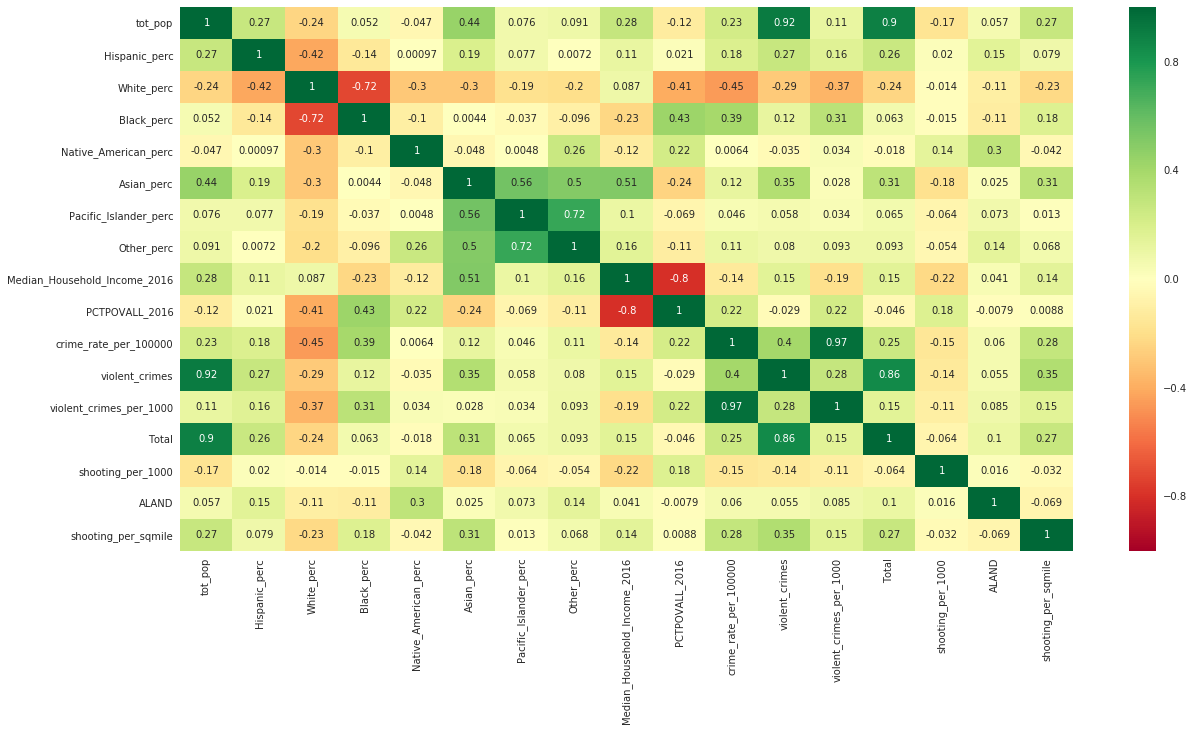

In [143]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df_county_1.corr(), annot=True, cmap="RdYlGn")
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


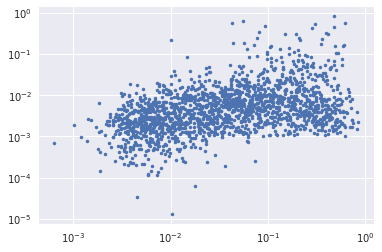

In [137]:
## Shoot per sqmile vs. black percentage
plt.plot(df_county_1['Black_perc'], df_county_1['shooting_per_sqmile'], '.')
plt.xscale('log')
plt.yscale('log')
plt.show()

- Asian_perc seems biased with population, and the plot was not good.
- Median income plot was not good.
- Crime rate plot was not good.
- Violent crime rate plot was not good.

In [170]:
df_county[['ctyname', 'Total']].sort_values(by='Total', ascending=False).head(10)

,ctyname,Total
203,Los Angeles County,299.0
102,Maricopa County,179.0
608,Cook County,99.0
2620,Harris County,95.0
217,Riverside County,82.0
220,San Bernardino County,79.0
361,Miami-Dade County,75.0
2576,Dallas County,73.0
221,San Diego County,69.0
1746,Clark County,67.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


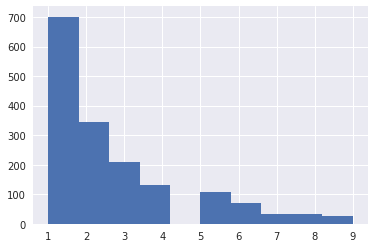

Almost all counties have less than 10 cases: 1658


In [181]:
plt.hist(df_county_1['Total'][df_county_1['Total'] < 10])
plt.show()
print("Almost all counties have less than 10 cases:", len(df_county_1['Total'][df_county_1['Total'] < 10]))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


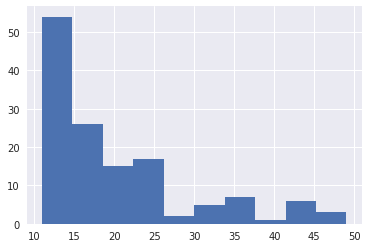

The number of counties with more than 10, less than 50 cases: 136


In [199]:
plt.hist(df_county_1['Total'][(df_county_1['Total'] > 10) & (df_county_1['Total'] < 50)])
plt.show()
print("The number of counties with more than 10, less than 50 cases:", 
      len(df_county_1['Total'][(df_county_1['Total'] > 10) & (df_county_1['Total'] < 50)]))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


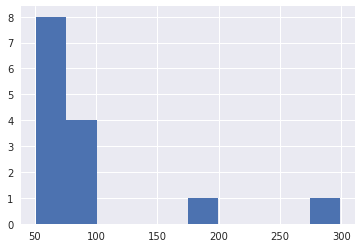

The number of counties with more than 50 cases: 14


In [202]:
plt.hist(df_county_1['Total'][df_county_1['Total'] > 50])
plt.show()
print("The number of counties with more than 50 cases:", 
      len(df_county_1['Total'][df_county_1['Total'] > 50]))

### So, look at the correlations for three different intervals: <10, 10-50, 50-300

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


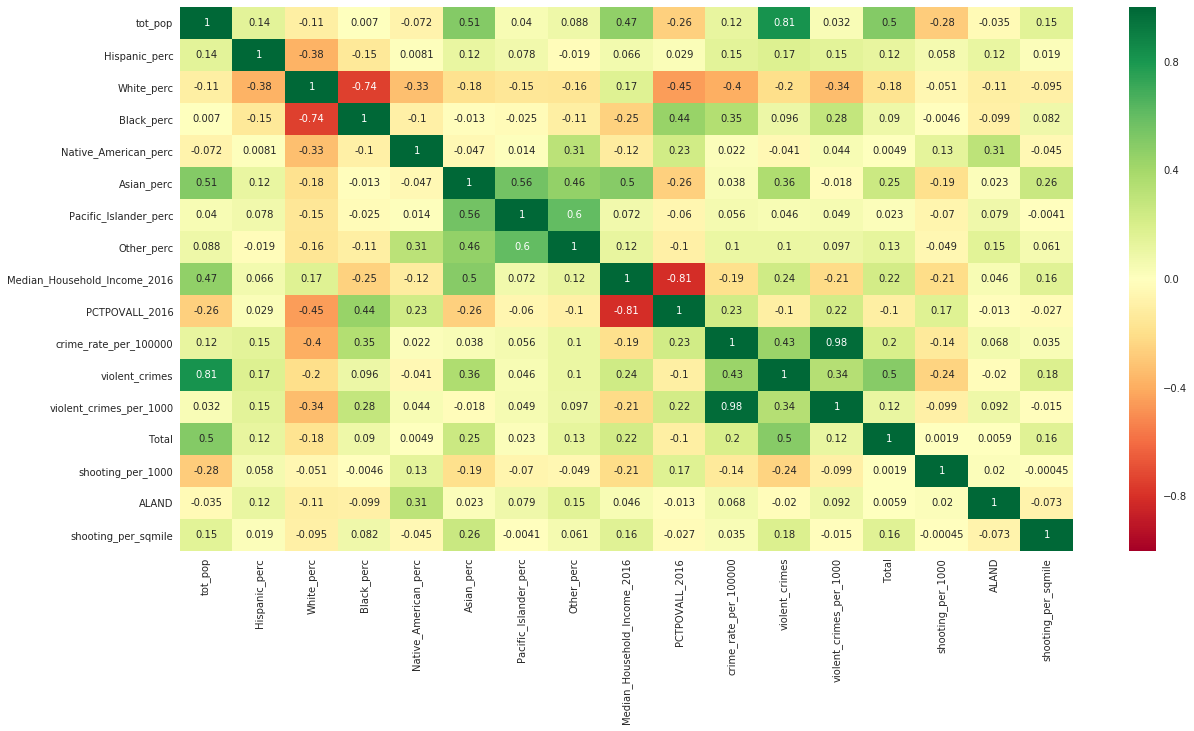

In [203]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df_county_1[df_county_1['Total'] < 10].corr(), annot=True, cmap="RdYlGn")
plt.show()

#### Comment: couldn't find any meaningful correlation above

### Between 10-50 gives significant results.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


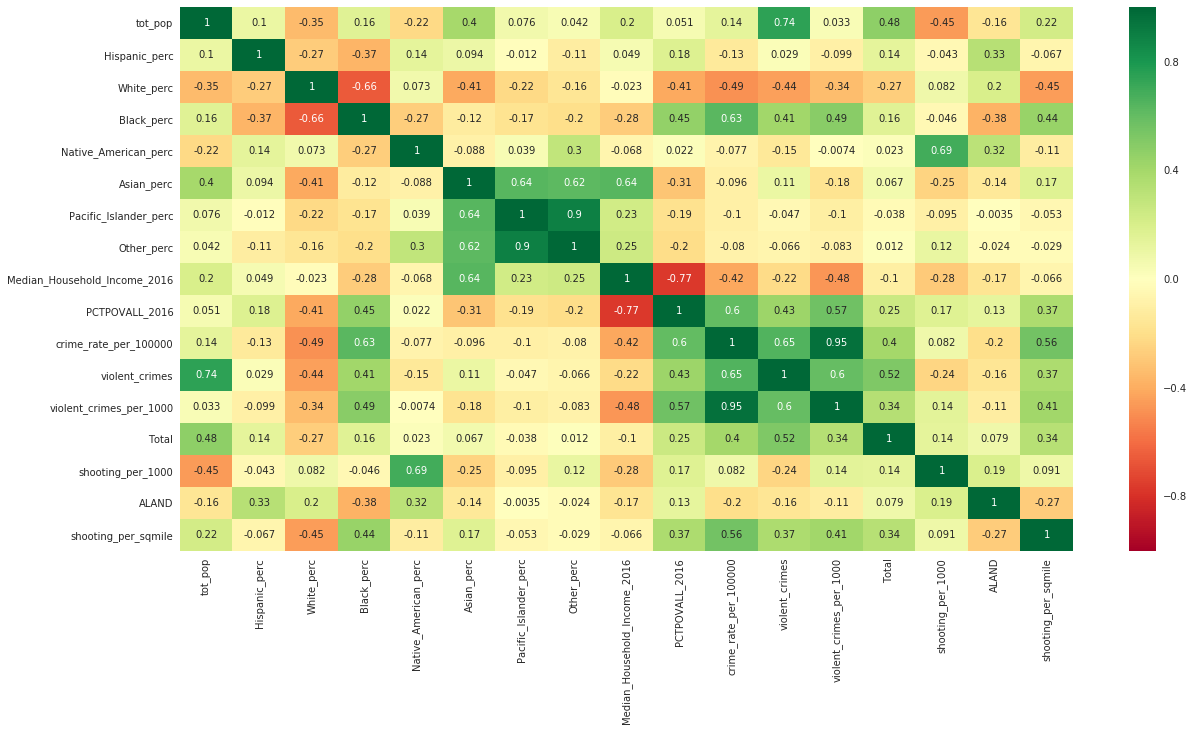

In [204]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df_county_1[(df_county_1['Total'] > 10) & (df_county_1['Total'] < 50)].corr(),
            annot=True, cmap="RdYlGn")
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


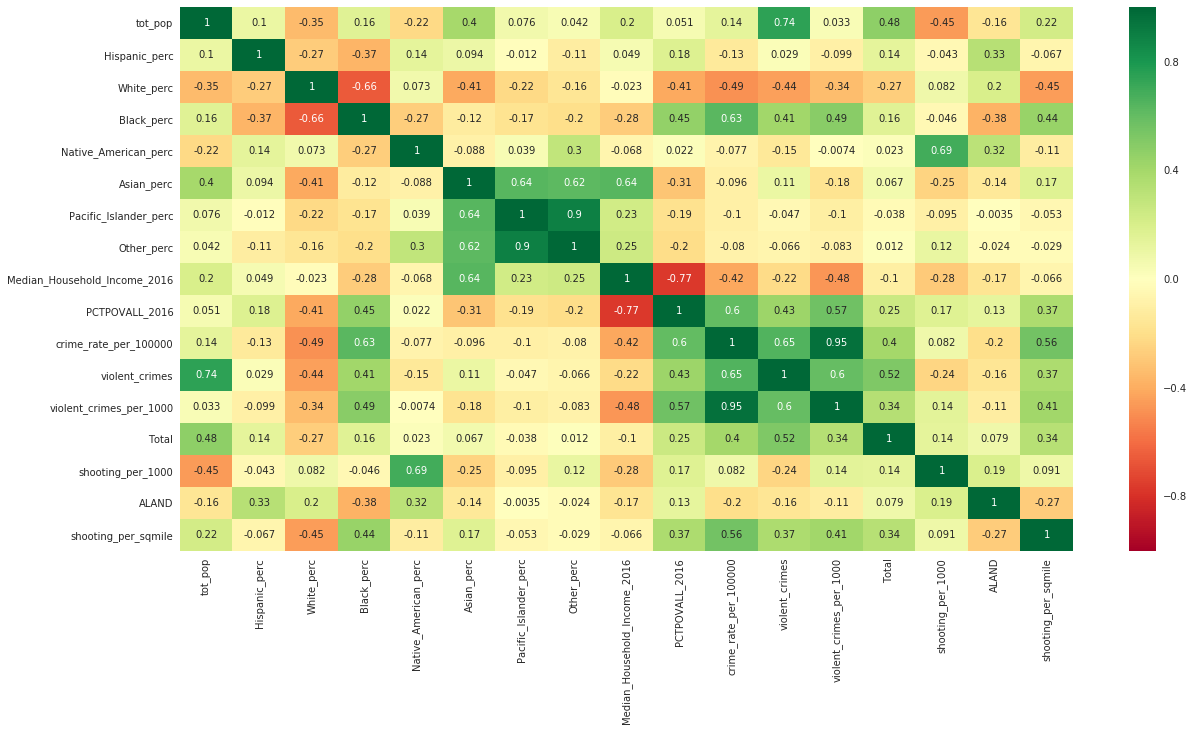

In [254]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df_county_1[(df_county_1['Total'] > 10) & (df_county_1['Total'] < 50)].corr(),
            annot=True, cmap="RdYlGn")
plt.show()

#### Plots for shootings between 10-50

In [212]:
df_county_10_50 = df_county_1[(df_county_1['Total'] > 10) & (df_county_1['Total'] < 50)]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


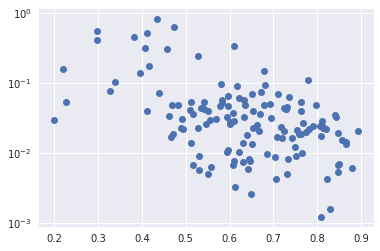

In [226]:
## Shoot per sqmile vs. black percentage

plt.plot(df_county_10_50['White_perc'], df_county_10_50['shooting_per_sqmile'], 'o')
#plt.xscale('log')
plt.yscale('log')
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


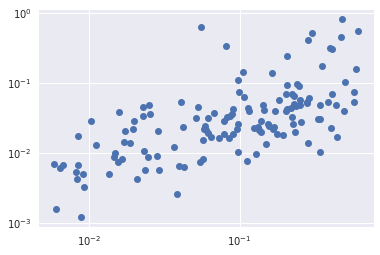

In [224]:
## Shoot per sqmile vs. black percentage

plt.plot(df_county_10_50['Black_perc'], df_county_10_50['shooting_per_sqmile'], 'o')
plt.xscale('log')
plt.yscale('log')
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


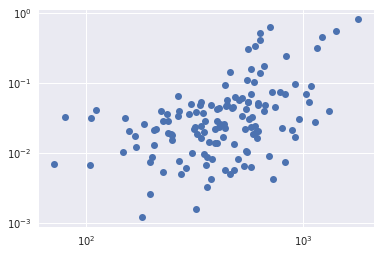

In [223]:
## Shoot per sqmile vs. black percentage

plt.plot(df_county_10_50['crime_rate_per_100000'], df_county_10_50['shooting_per_sqmile'], 'o')
plt.xscale('log')
plt.yscale('log')
plt.show()

### OLS for all variables

In [230]:
df_county_10_50.columns

Index(['tot_pop', 'Hispanic_perc', 'White_perc', 'Black_perc',
       'Native_American_perc', 'Asian_perc', 'Pacific_Islander_perc',
       'Other_perc', 'Median_Household_Income_2016', 'PCTPOVALL_2016',
       'crime_rate_per_100000', 'violent_crimes', 'violent_crimes_per_1000',
       'Total', 'shooting_per_1000', 'ALAND', 'shooting_per_sqmile'],
      dtype='object')

In [252]:
#create a formulae for OLS using all variables
formula = 'shooting_per_sqmile ~ Hispanic_perc + White_perc + Black_perc + Native_American_perc + \
                                 Asian_perc + Pacific_Islander_perc + Other_perc + Median_Household_Income_2016 + \
                                 PCTPOVALL_2016 + crime_rate_per_100000'
formula

'shooting_per_sqmile ~ Hispanic_perc + White_perc + Black_perc + Native_American_perc +                                  Asian_perc + Pacific_Islander_perc + Other_perc + Median_Household_Income_2016 +                                  PCTPOVALL_2016 + crime_rate_per_100000'

In [228]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [253]:
lm = smf.ols(formula=formula + '-1', data = df_county_10_50).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     shooting_per_sqmile   R-squared:                       0.439
Model:                             OLS   Adj. R-squared:                  0.399
Method:                  Least Squares   F-statistic:                     10.94
Date:                 Mon, 10 Dec 2018   Prob (F-statistic):           1.83e-12
Time:                         18:31:54   Log-Likelihood:                 132.49
No. Observations:                  136   AIC:                            -245.0
Df Residuals:                      126   BIC:                            -215.9
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Hispan

In [255]:
#create a formulae for OLS using all variables
#formula2 = 'shooting_per_sqmile ~ Hispanic_perc + White_perc + Black_perc + Native_American_perc + \
                                 #Asian_perc + Pacific_Islander_perc + Other_perc + Median_Household_Income_2016 + \
                                 #PCTPOVALL_2016 + crime_rate_per_100000'
#formula2

### Comment 1 on results: Correlation table gives mixed messages. (for 10-50, because corr. does not say much for <10)
- Looking to Total number of shooting is pretty much population biased.
- When we normalize this by dividing population and area respetively, we got two different picture. Especially, racial coefficients changed completely. On the other hand, poverty and crime rates contribute significantly in each. I went with the area one and check log-scale plots for high-correlated variables.
- When we apply OLS for area-divided we got mediocre R-squared and p-values(races are contributing also)
- When we apply OLS for Total shooting we got R-squared and p-values are not enough!
- When we applt OLS for population-divided shooting we got best R-squared but p-values and coefficient are weird!

### More than 50 

### Update on roadmap

-Plot shooting_per_sqmile with a high correlated variables. 

-If you some pattern, linear or quadratic, normal or log scale, apply the model and see the results. 
#### Important: Look at the correlations and plots again after seeing the shooting distribution. Maybe you can make partitions before putting them into analysis.

-Make clusters using the variables you have, decide the k-value after couple of tryouts or as a result of elbow method. Then visualize it. Do you see anything? Check the spatial autocorrelation and clusters using spatial analysis techniques.

-Making use of the variables in shooting dataset: Make a cluster for those variables to see if some variables dominates others.

#### This is important: Analyze the datasets with non-shooting counties, too. Make a binary classification or multi-class classification(check the histograms and come of with a couple of bins), using the variables you have. Try to predict if you can classify counties by their shooting classes.